In [277]:
import numpy as np
import itertools
from collections import Counter
import sys
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [283]:
class MMboard:
    '''An instance of a MasterMind board.
    
    The object of the game is to guess the hidden code of length L, 
    where each code element is any one of C characters. 
    
    In response to a guess of the code, if the code is incorrect,
    a response (b, w) is provided; b represents the number of 
    characters where the correct character is provided in the 
    correct position, whereas w represents the number of characters
    that are in the code but are in the wrong position (i.e. the
    number of characters that are actually in the code but are not
    in the position guessed). 
    
    The game continues until the correct code is guessed, or until
    a predefined number of allowable tries have been exhausted. 
    
    Note: currently supports numcolors<=10. '''
    
    def __init__ (self, codelength=4, numcolors=6, max_tries=10, suppress_output=False):
        
        assert (codelength >= 1) and (max_tries >= 1)
        assert (numcolors >= 1)  and (numcolors <= 10)
        
        self._L = codelength
        self._C = numcolors
        self._N_iters = max_tries
        self._nooutput = suppress_output
        
        self._code = np.zeros(self._L)  # contains the code
        
        self.n_guessed = 0  # number of guesses tried
        self.gameover = False
    
    def _codeOK(self, cc):
        '''Helper function to check that inputs for code are in
        proper form. '''
        
        try:
            init = np.array([int(item) for item in cc])
        except:
            raise ValueError('Code not in the form of a list/array of length ' + str(self._L))

        if len(init) != self._L:
            raise ValueError('Code not of length ' + str(self._L))

        if not all(isinstance(item, int) for item in init):
            raise ValueError('Each character must be an integer, between 0 and ' + str(self._C - 1))

        if not((init >= 0).all() and (init <= self._C - 1).all()):
            raise ValueError('Each integer must be between 0 and ' + str(self._C - 1)) 
        
        return True
        
    def set_code(self, custom=None, showcode=True):
        '''Initalize/reset the code.
        
        Can set the code manually (provide a list or array of length L)
        or set one at random (default).
        
        Example: myboard.set_code([0, 1, 2, 3])
        
        showcode: whether or not the code being set is displayed
        '''
        
        if (custom is not None) and self._codeOK(custom):  
            self._code = np.array([int(item) for item in custom])
        else:
            self._code = np.random.randint(0, self._C, size=self._L)  # each element is [0, C)
        
        if showcode and (not self._nooutput):
            print "Code successfully initialized to ", self._code, "\n"
        elif not self._nooutput:
            print "Code successfully initialized. Good luck.\n"
            
        self.n_guessed = 0  # reset guess counter
        self.gameover = False
        
    def check_guess(self, guess, answer):
        '''Process a guess given the correct code.
        
        Take a guess in the form of a list of integers, and returns
        (number of characters in the correct position,
         number of characters in the wrong position but elsewhere in code).
         
        Usually, the answer will be the secret code (self._code), but this
        method can be used to compare any guess to any answer.
        
        Example: myboard.guess_code([0, 1, 2, 3], self._code)
        Returns: (1, 1)  # self._code is [2 1 4 4] '''
        
        # counters
        corpos = 0  
        wrongpos = 0  
        # track non-counted characters
        code_left = []
        guess_left = []
       
        # check for correct digit in correct place  
        for i, digit in enumerate(answer):            
            if digit==guess[i]:
                corpos += 1  
            else:
                code_left.append(digit)
                guess_left.append(guess[i])
            
        assert len(code_left) == len(guess_left)

        if len(code_left)>0:
            # check for correct digit in wrong place
            for digit in code_left:
                if digit in guess_left:
                    wrongpos += 1
                    guess_left.remove(digit) # removes only one occurrence
        
        return (corpos, wrongpos)

    def guess_code(self, guess):
        '''Entry method to process guess, with a check to see if number of guesses has
        been exceeded, or code guessed correctly.
        
        If game is over, self.gameover is set to True.
        
        Returns: a tuple - (number of characters in the correct position,
                            number of characters in the wrong position but elsewhere in code); 
                  None if there was an error in the guess; or
                  -1 if game is over'''

        if not self.gameover:
            try:
                assert self._codeOK(guess)
                self.n_guessed += 1
                if not self._nooutput:
                    print "guess #" + str(self.n_guessed) + " of " + str(self._N_iters) + ": you guessed ", guess 
                    sys.stdout.flush()
            except:
                if not self._nooutput:
                    print "  [Error] please enter a list of %i integers from 0 to %i. try again" % (self._L, self._C - 1)
                return None
        
            # get response
            b, w = self.check_guess(guess=guess, answer=self._code)
            assert (b + w) <= self._L

            if b == self._L:
                if not self._nooutput:
                    print "You have %i right item(s) in the right place" % b
                    print "You win!"
                self.gameover = True
                return (b, w)
            
            if not self._nooutput:                
                print "You have %i right item(s) in the right place, and" % b
                print "  %i right item(s) but in the wrong place\n" % w 
            
            if self.n_guessed == self._N_iters:
                if not self._nooutput:
                    print "Game over. The correct code was", self._code  
                self.gameover = True

            return (b, w)
        
        # else
        return -1  # game already over

In [237]:
a = MMboard()
# a = MMboard(suppress_output=True)

In [238]:
a.set_code([2, 1, 4, 4])

Code successfully initialized to  [2 1 4 4] 



In [239]:
a.guess_code([0, 1, 2, 4])

guess #1 of 10: you guessed  [0, 1, 2, 4]
You have 2 right item(s) in the right place, and
  1 right item(s) but in the wrong place



(2, 1)

In [240]:
a.guess_code([0, 3, 2, 4])

guess #2 of 10: you guessed  [0, 3, 2, 4]
You have 1 right item(s) in the right place, and
  1 right item(s) but in the wrong place



(1, 1)

In [241]:
a.guess_code([0, 3, 2, 9])

  [Error] please enter a list of 4 integers from 0 to 5. try again


In [242]:
a.guess_code([1, 1, 1, 1])

guess #3 of 10: you guessed  [1, 1, 1, 1]
You have 1 right item(s) in the right place, and
  0 right item(s) but in the wrong place



(1, 0)

In [243]:
a.guess_code([4, 4, 4, 4])

guess #4 of 10: you guessed  [4, 4, 4, 4]
You have 2 right item(s) in the right place, and
  0 right item(s) but in the wrong place



(2, 0)

In [244]:
a.guess_code([1, 2, 4, 4])

guess #5 of 10: you guessed  [1, 2, 4, 4]
You have 2 right item(s) in the right place, and
  2 right item(s) but in the wrong place



(2, 2)

In [245]:
a.guess_code([2, 1, 4, 4])

guess #6 of 10: you guessed  [2, 1, 4, 4]
You have 4 right item(s) in the right place
You win!


(4, 0)

In [246]:
a.guess_code([1, 1, 4, 4]) # game already over

-1

In [247]:
a.set_code([1, 1, 3, 3])

Code successfully initialized to  [1 1 3 3] 



In [248]:
a.guess_code([0, 0, 0, 0])

guess #1 of 10: you guessed  [0, 0, 0, 0]
You have 0 right item(s) in the right place, and
  0 right item(s) but in the wrong place



(0, 0)

In [249]:
a.guess_code([0, 0, 0, 0])
a.guess_code([0, 0, 0, 0])
a.guess_code([0, 0, 0, 0])
a.guess_code([0, 0, 0, 0])
a.guess_code([0, 0, 0, 0])
a.guess_code([0, 0, 0, 0])
a.guess_code([0, 0, 0, 0])
a.guess_code([0, 0, 0, 0])
a.guess_code([0, 0, 0, 0])

guess #2 of 10: you guessed  [0, 0, 0, 0]
You have 0 right item(s) in the right place, and
  0 right item(s) but in the wrong place

guess #3 of 10: you guessed  [0, 0, 0, 0]
You have 0 right item(s) in the right place, and
  0 right item(s) but in the wrong place

guess #4 of 10: you guessed  [0, 0, 0, 0]
You have 0 right item(s) in the right place, and
  0 right item(s) but in the wrong place

guess #5 of 10: you guessed  [0, 0, 0, 0]
You have 0 right item(s) in the right place, and
  0 right item(s) but in the wrong place

guess #6 of 10: you guessed  [0, 0, 0, 0]
You have 0 right item(s) in the right place, and
  0 right item(s) but in the wrong place

guess #7 of 10: you guessed  [0, 0, 0, 0]
You have 0 right item(s) in the right place, and
  0 right item(s) but in the wrong place

guess #8 of 10: you guessed  [0, 0, 0, 0]
You have 0 right item(s) in the right place, and
  0 right item(s) but in the wrong place

guess #9 of 10: you guessed  [0, 0, 0, 0]
You have 0 right item(s) in

(0, 0)

In [250]:
a.guess_code([0, 0, 0, 0])

-1

In [244]:
b = MMboard()
b.set_code(showcode=False)

Code successfully initialized. Good luck.


In [245]:
b.guess_code([0, 0, 0, 0])

guess #1 of 10: you guessed  [0, 0, 0, 0]
you have 0 right item(s) in the right place, and 0 right item(s) but in the wrong place


In [246]:
b.guess_code([1, 1, 1, 1])

guess #2 of 10: you guessed  [1, 1, 1, 1]
you have 1 right item(s) in the right place, and 0 right item(s) but in the wrong place


In [247]:
b.guess_code([2, 2, 2, 2])

guess #3 of 10: you guessed  [2, 2, 2, 2]
you have 2 right item(s) in the right place, and 0 right item(s) but in the wrong place


In [248]:
b.guess_code([3, 3, 3, 3])

guess #4 of 10: you guessed  [3, 3, 3, 3]
you have 0 right item(s) in the right place, and 0 right item(s) but in the wrong place


In [249]:
b.guess_code([4, 4, 4, 4])

guess #5 of 10: you guessed  [4, 4, 4, 4]
you have 0 right item(s) in the right place, and 0 right item(s) but in the wrong place


In [250]:
b.guess_code([1, 2, 2, 5])

guess #6 of 10: you guessed  [1, 2, 2, 5]
you have 1 right item(s) in the right place, and 3 right item(s) but in the wrong place


In [251]:
b.guess_code([5, 1, 2, 2])

guess #7 of 10: you guessed  [5, 1, 2, 2]
you have 2 right item(s) in the right place, and 2 right item(s) but in the wrong place


In [252]:
b.guess_code([5, 2, 1, 2])

guess #8 of 10: you guessed  [5, 2, 1, 2]
you have 4 right item(s) in the right place, and 0 right item(s) but in the wrong place
You win!


## Knuth's Algorithm (baseline)

In [275]:
def knuth(cl=4, nc=6, silent=False):
    # implements Knuth's Five-Guess Algorithm
    # expanded for arbitrary code lengths and alphabet
    # https://en.wikipedia.org/wiki/Mastermind_(board_game)
    # NOTE: we are using a 0-index

    k = MMboard(codelength=cl, numcolors=nc, suppress_output=silent)
    k.set_code()
    
    n_guesses = 0
    
    # 1. Create the set S of 1296 possible codes (1111, 1112 ... 6665, 6666)
    S = {}  # index is the string sequence, value is a cl-element tuple
    digits = list(np.arange(nc))
    for i in itertools.product(digits, repeat=cl):
        S[''.join(map(str, list(i)))] = list(i) 
    assert len(S) == nc**cl
    
    possible_guesses = S.copy()  # keep track of list of possible guesses

    # 2. Start with initial guess 1122    
    assert nc >= 2
    if cl==4:
        knuth_guess = [0, 0, 1, 1]  # 0-indexed
    else:
        knuth_guess = list(np.random.randint(0, nc, cl)) # n.b. random choice may be suboptimal

    # 7. loop
    while True:
        # this is not an infinite loop - 
        # maximum iterations governed by max number of possible guesses
        
        # delete current guess from possible guesses
        del possible_guesses[''.join(map(str, knuth_guess))]
        
        # 3. Play the guess to get a response of colored (b) and white pegs.
        response = k.guess_code(knuth_guess)
        n_guesses += 1

        # 4. If the response is four colored pegs, the game is won, the algorithm terminates.
        #    If maximum number of tries reached, the algorithm terminates.
        if ((response is not None) and response[0]==cl) or k.gameover:
            return n_guesses
        
        # 5. Otherwise, remove from S any code that would not give the same response 
        #    if it (the guess) were the code.
        # print "number of keys to check:", len(S)
        for code in S.keys():
            # Uses classes built-in check_guess function
            temp = k.check_guess(guess=S[code], answer=knuth_guess)
            if temp!=response:
                # print "deleted", S[code]
                del S[code]
        # print "number of keys left to check:", len(S)

        # 6. For each possible guess, that is, any unused code of the 1296 not just those in S, 
        #    calculate how many possibilities in S would be eliminated for each possible 
        #    colored/white peg score. The score of a guess is the minimum number of possibilities 
        #    it might eliminate from S. A single pass through S for each unused code of the 1296 
        #    will provide a hit count for each colored/white peg score found; the colored/white 
        #    peg score with the highest hit count will eliminate the fewest possibilities;
        #    calculate the score of a guess by using 
        #      "minimum eliminated" = "count of elements in S" - "highest hit count". 
        #    From the set of guesses with the maximum score, select one as the next guess, 
        #    choosing a member of S whenever possible.

        if len(S)==1:
            knuth_guess = S.values()[0]
            # print ''.join(map(str, knuth_guess)) in S
        else:
            # use of collection counter
            # inspired by http://stackoverflow.com/questions/20298190/mastermind-minimax-algorithm
            key = lambda g: max(Counter(k.check_guess(g, item) for item in S.values()).values())               
            # secondary sort by choosing member of S
            # inspired by https://docs.python.org/2/howto/sorting.html
            secondary_sort = sorted(possible_guesses.values(), key=lambda x: x not in S.values())
            knuth_guess = min(secondary_sort, key=key)
            
            # print ''.join(map(str, knuth_guess)) in S

        # print "next guess", knuth_guess

In [272]:
knuth()

Code successfully initialized to  [2 3 4 0] 

guess #1 of 10: you guessed  [0, 0, 1, 1]
You have 0 right item(s) in the right place, and
  1 right item(s) but in the wrong place

guess #2 of 10: you guessed  [4, 4, 2, 0]
You have 1 right item(s) in the right place, and
  2 right item(s) but in the wrong place

guess #3 of 10: you guessed  [4, 3, 0, 2]
You have 1 right item(s) in the right place, and
  3 right item(s) but in the wrong place

guess #4 of 10: you guessed  [2, 3, 4, 0]
You have 4 right item(s) in the right place
You win!


4

In [281]:
knuth(nc=10, cl=4) # 10 colors, code length 4

Code successfully initialized to  [7 3 0 2] 

guess #1 of 10: you guessed  [0, 0, 1, 1]
You have 0 right item(s) in the right place, and
  1 right item(s) but in the wrong place

guess #2 of 10: you guessed  [2, 1, 4, 0]
You have 0 right item(s) in the right place, and
  2 right item(s) but in the wrong place

guess #3 of 10: you guessed  [5, 6, 0, 4]
You have 1 right item(s) in the right place, and
  0 right item(s) but in the wrong place

guess #4 of 10: you guessed  [8, 0, 3, 2]
You have 1 right item(s) in the right place, and
  2 right item(s) but in the wrong place

guess #5 of 10: you guessed  [3, 2, 7, 7]
You have 0 right item(s) in the right place, and
  3 right item(s) but in the wrong place

guess #6 of 10: you guessed  [7, 3, 0, 2]
You have 4 right item(s) in the right place
You win!


6

In [284]:
import time
N_sims = 10

alphabet = [2, 4, 6, 8, 10]  # number of possible `colors` per position
mean_guesses = np.zeros(len(alphabet))
mean_times = np.zeros(len(alphabet))

for j, a in enumerate(alphabet):
    simguesses = np.zeros(N_sims)
    simtimes = np.zeros(N_sims)
    for i in xrange(N_sims):
        start = time.time()
        simguesses[i] = knuth(nc=a, silent=True)
        simtimes[i] = time.time() - start

    mean_guesses[j] = np.mean(simguesses)
    mean_times[j] = np.mean(simtimes)

In [285]:
mean_times

array([  8.61668587e-04,   3.87444496e-02,   1.07932272e+00,
         1.53864245e+01,   1.22476159e+02])

In [286]:
mean_guesses

array([ 3.2,  3.9,  4.6,  5.3,  6.1])

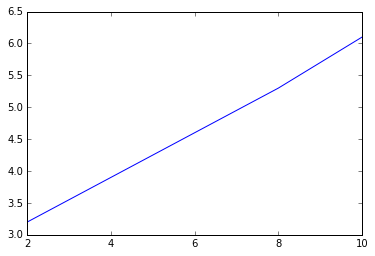

In [291]:
plt.xticks(range(len(alphabet)), alphabet)
plt.plot(mean_guesses);

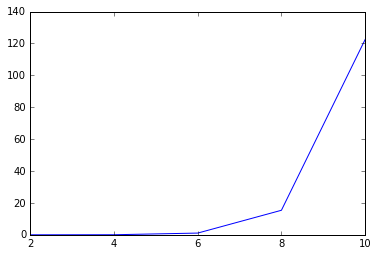

In [292]:
plt.xticks(range(len(alphabet)), alphabet)
plt.plot(mean_times);

times grow exponentially with number of colors

In [296]:
N_sims = 3

lengths = [2, 4, 6, 8, 10]  # number of possible code lengths
mean_guesses = np.zeros(len(lengths))
mean_times = np.zeros(len(lengths))

for j, a in enumerate(lengths):
    print j
    simguesses = np.zeros(N_sims)
    simtimes = np.zeros(N_sims)
    for i in xrange(N_sims):
        start = time.time()
        simguesses[i] = knuth(cl=a, silent=True)
        simtimes[i] = time.time() - start

    mean_guesses[j] = np.mean(simguesses)
    mean_times[j] = np.mean(simtimes)

0
1
2


KeyboardInterrupt: 

In [297]:
mean_guesses

array([ 3.33333333,  4.33333333,  0.        ,  0.        ,  0.        ])

In [298]:
mean_times

array([ 0.00597239,  1.33273959,  0.        ,  0.        ,  0.        ])

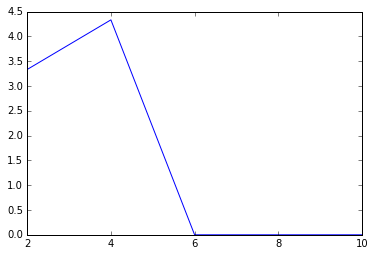

In [299]:
plt.xticks(range(len(lengths)), lengths)
plt.plot(mean_guesses);

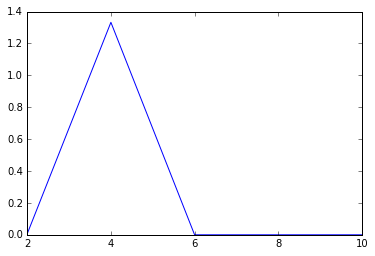

In [300]:
plt.xticks(range(len(lengths)), lengths)
plt.plot(mean_times);

problem blows up with longer lengths